In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv(r"C:\Users\rasgu\OneDrive\Documents\VS Code\ml\datasets\loan.csv")
dataset.head(3)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


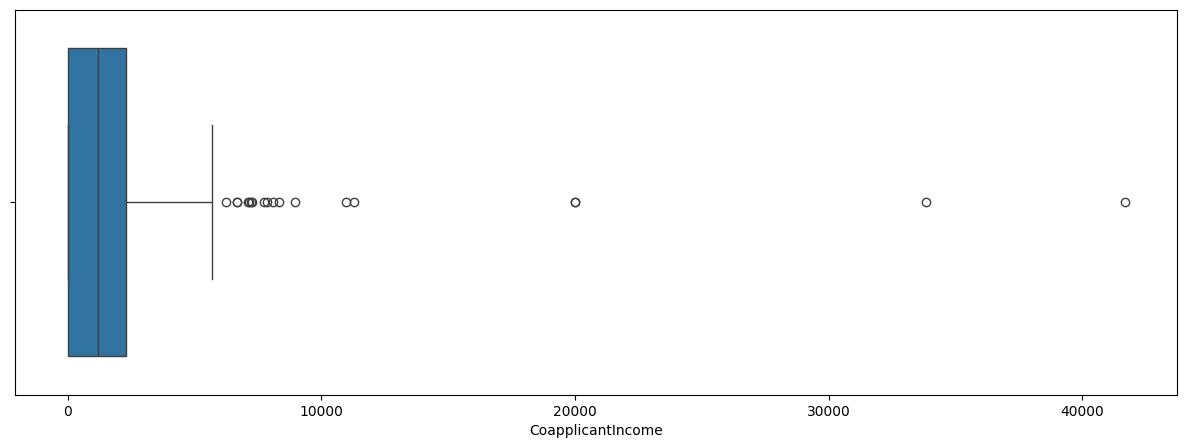

In [23]:
#see outlier using box plot
plt.figure(figsize=(15,5))
sns.boxplot(x="CoapplicantIncome",data=dataset)
plt.show()

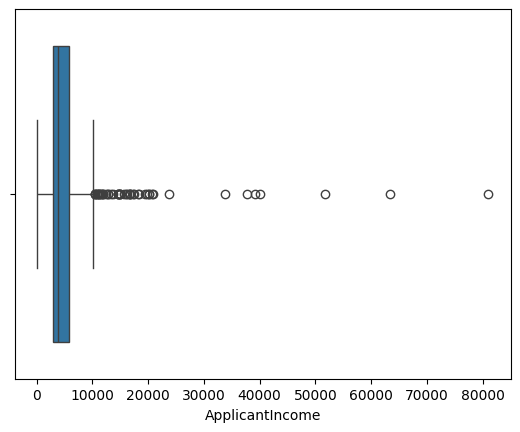

In [10]:
sns.boxplot(x="ApplicantIncome",data=dataset)
plt.show()

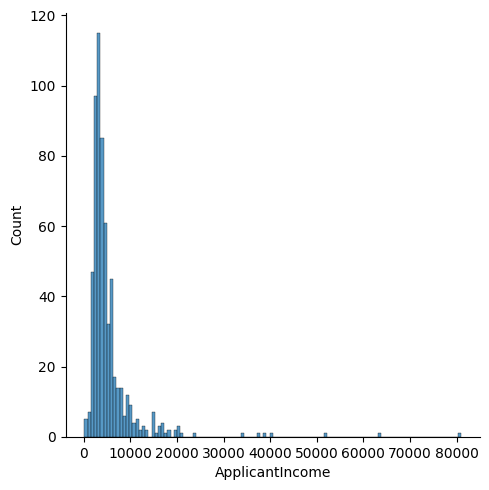

In [ ]:
sns.displot(dataset["ApplicantIncome"]) #distribution plot
plt.show()

In [ ]:
l=[5,6,7,3,2,4,7,5]
sum(l)/len(l) #avg

4.875

In [14]:
#outlier removal-iqr(Interquartile Range=q3-q1) technique
#Q1 (First Quartile): 25th percentile (middle of the lower half)
#Q3 (Third Quartile): 75th percentile (middle of the upper half)

dataset.shape
q1=dataset["CoapplicantIncome"].quantile(0.25)
q1

np.float64(0.0)

In [15]:
q3=dataset["CoapplicantIncome"].quantile(0.75)
q3

np.float64(2297.25)

In [16]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [19]:
iqr=q3-q1
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
min_range, max_range

(np.float64(-3445.875), np.float64(5743.125))

In [29]:
new_dataset=dataset[dataset["CoapplicantIncome"]<max_range]
new_dataset.shape

(596, 13)

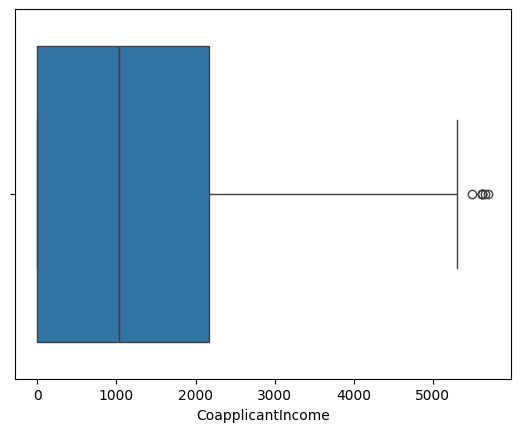

In [30]:
sns.boxplot(x="CoapplicantIncome",data=new_dataset)
plt.show() #clean data
#min outliers are seen which are ok

In [ ]:
#new_new_dataset=dataset[dataset["CoapplicantIncome"]<min_range]
#new_new_dataset.shape
#sns.boxplot(x="CoapplicantIncome",data=new_new_dataset)
#plt.show() 

(0, 13)